In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay




In [2]:
fish = pd.read_csv('./data/fish.csv')
hearing = pd.read_csv('./data/hearing_test.csv')
airlines = pd.read_csv('./data/Invistico_Airline.csv')
mushroom = pd.read_csv('./data/secondary_data.csv')
weather = pd.read_csv('./data/weather_forecast_data.csv')

In [3]:
fish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [7]:
fish.head()

,Species,Weight,Length1,Length2,Length3,Height,Width,Species_binary
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200,0
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056,0
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961,0
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555,0
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340,0


In [4]:
fish['Species'].value_counts()

Species
Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: count, dtype: int64

In [8]:
def ommiter(value):
    if value == 'Perch':
        return 1
    elif value == 'Roach':
        return 1
    else:
        return 0

fish['Species_binary'] = fish['Species'].apply(ommiter)

fish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Species         159 non-null    object 
 1   Weight          159 non-null    float64
 2   Length1         159 non-null    float64
 3   Length2         159 non-null    float64
 4   Length3         159 non-null    float64
 5   Height          159 non-null    float64
 6   Width           159 non-null    float64
 7   Species_binary  159 non-null    int64  
dtypes: float64(6), int64(1), object(1)
memory usage: 10.1+ KB


In [10]:
fish['Species_binary'].value_counts()

Species_binary
0    83
1    76
Name: count, dtype: int64

In [13]:
fish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Species         159 non-null    object 
 1   Weight          159 non-null    float64
 2   Length1         159 non-null    float64
 3   Length2         159 non-null    float64
 4   Length3         159 non-null    float64
 5   Height          159 non-null    float64
 6   Width           159 non-null    float64
 7   Species_binary  159 non-null    int64  
dtypes: float64(6), int64(1), object(1)
memory usage: 10.1+ KB


In [ ]:
# features = ['Weight', 'Length1', 'Length2', 'Length3', 'Height', 'Width']

# X = fish[features]

X = fish.drop(['Species', 'Species_binary'], axis=1)
y = fish['Species_binary']


x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

x_train.shape

(127, 6)

In [14]:

#instantiate model
log_r = LogisticRegression(max_iter=200)

log_r.fit(x_train, y_train)


LogisticRegression(max_iter=200)

In [20]:
log_r.classes_

array([0, 1], dtype=int64)

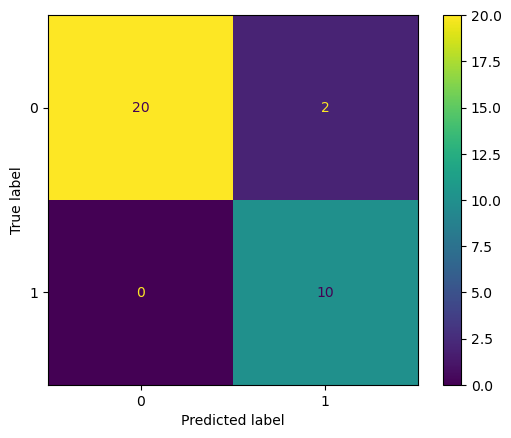

In [23]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#prediction
y_preds = log_r.predict(x_test)

#evaluation
cm = confusion_matrix(y_test, y_preds, labels=[0, 1])
ConfusionMatrixDisplay(cm ).plot()

In [25]:
precision_score(y_test, y_preds)

0.8333333333333334

In [26]:
recall_score(y_test, y_preds)

1.0

In [27]:
f1_score(y_test, y_preds)

0.9090909090909091

In [ ]:
from sklearn.tree import DecisionTreeClassifier


#instantiate model
tree = DecisionTreeClassifier(random_state=21)


""" 
    criterion: Literal['gini', 'entropy', 'log_loss'] = "gini",
    splitter: Literal['best', 'random'] = "best",
    max_depth: Int | None = None,
    min_samples_split: float = 2,
    min_samples_leaf: float = 1,
    min_weight_fraction_leaf: Float = 0,
    max_features: float | Literal['auto', 'sqrt', 'log2'] | None = None,
    random_state: Int | RandomState | None = None,
    max_leaf_nodes: Int | None = None,
    min_impurity_decrease


"""

#hyperparameter tuning
# param_grid = {
#     'criterion': ['gini', 'entropy'],
#     'max_depth': [range(1, 100)],
#     'min_samples_split': [4, 12, 20, 50, 100],
#     'min_samples_leaf': [1, 2, 5, 10, 30],
#     'random_state': [range(1, 50)]
# }    


